In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr, zscore

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [41]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Bank Churn Synthetic Data/Bank-Churn-Synthetic-Data.csv')
data

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,-3.124437e-07,-4.605946e-07,1.335144e-06,-6.116396e-06,6.694578e-06,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,4.813383e-07,8.389315e-07,-1.182815e-06,7.812514e-06,1.663329e-06,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,-3.447294e-04,-2.025034e-03,-1.028072e-03,-9.387155e-03,1.506864e-02,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,-7.220936e-05,-1.046163e-03,1.312913e-03,8.463003e-04,1.607584e-02,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,-1.037135e-07,-5.451338e-07,4.984559e-08,-1.568877e-06,1.848919e-06,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,-4.763763e-12,1.141194e-10,1.165557e-10,-1.177945e-10,-4.259289e-10,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,-1.510370e-12,6.854618e-11,4.674402e-11,-5.834499e-10,-4.198716e-10,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,-1.510370e-12,6.854618e-11,4.674402e-11,-5.834499e-10,-4.198716e-10,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,8.306523e-05,9.769052e-04,1.606554e-03,-7.042491e-04,1.883437e-03,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

In [ ]:
data.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

**GIẢI THÍCH DỮ LIỆU:**

**Surname:** Họ của khách hàng.

**CreditScore:** Điểm tín dụng của khách hàng, thể hiện mức độ tin cậy tài chính của họ.

**Age:** Tuổi của khách hàng.

**Tenure:** Số năm mà khách hàng đã gắn bó với ngân hàng.

**Balance:** Số dư tài khoản hiện tại của khách hàng.

**NumOfProducts:** Số lượng sản phẩm mà khách hàng đang sử dụng từ ngân hàng (như thẻ tín dụng, khoản vay, tài khoản tiết kiệm, v.v.).

**HasCrCard:** Biến nhị phân (0 hoặc 1), cho biết khách hàng có thẻ tín dụng hay không.

**IsActiveMember:** Biến nhị phân (0 hoặc 1), cho biết khách hàng có phải là thành viên hoạt động của ngân hàng hay không.

**EstimatedSalary:** Mức lương ước tính của khách hàng.

**Exited:** Biến nhị phân (0 hoặc 1), cho biết liệu khách hàng có rời khỏi ngân hàng hay không.

**Surname_tfidf_0, Surname_tfidf_1, Surname_tfidf_2, Surname_tfidf_3, Surname_tfidf_4:** Các cột này có thể là các giá trị biến đổi từ cột Surname thông qua phương pháp TF-IDF (Term Frequency-Inverse Document Frequency), thường được sử dụng trong xử lý ngôn ngữ tự nhiên (NLP). Các cột này có thể đại diện cho các thành phần của vector TF-IDF được áp dụng cho Surname để bắt các đặc trưng từ tên họ của khách hàng.

**France, Germany, Spain:** Các biến nhị phân (0 hoặc 1), cho biết quốc gia mà khách hàng cư trú (ví dụ, France = 1 có nghĩa là khách hàng sống ở Pháp).

**Female, Male:** Các biến nhị phân (0 hoặc 1), cho biết giới tính của khách hàng (Female = 1 nghĩa là khách hàng là nữ, Male = 1 nghĩa là khách hàng là nam).

**Mem__no__Products:** Biến này có thể là tổ hợp hoặc tương tác giữa số lượng sản phẩm mà khách hàng sử dụng (NumOfProducts) và trạng thái thành viên của họ (IsActiveMember).

**Cred_Bal_Sal:** Biến tổng hợp từ CreditScore, Balance và EstimatedSalary, có thể để biểu thị tổng quan về khả năng tài chính của khách hàng.

**Bal_sal:** Biến tổng hợp từ Balance và EstimatedSalary, thể hiện mối quan hệ giữa số dư tài khoản và mức lương ước tính của khách hàng.

**Tenure_Age:** Biến tổng hợp từ Tenure và Age, biểu thị mối quan hệ giữa thời gian gắn bó với ngân hàng và tuổi của khách hàng.

**Age_Tenure_product:** Biến tổng hợp từ Age, Tenure và NumOfProducts, có thể được sử dụng để phân tích mối quan hệ phức tạp giữa tuổi, thời gian gắn bó, và số lượng sản phẩm mà khách hàng sử dụng.

In [42]:
data.describe()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
count,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,1.750280e+05,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,1.750280e+05,175028.000000,175028.000000,175028.000000
mean,1617.462812,656.113068,38.171337,5.019968,56676.772103,1.553072,0.751183,0.498754,111863.295024,0.211149,2.962245e-02,0.014147,-0.008085,0.015383,0.004054,0.566909,0.212046,0.221045,0.436644,0.563356,0.784989,1.444363e+03,2.202494,0.138587,191.346929
std,813.852174,81.148273,8.969565,2.811155,62982.418525,0.549212,0.432329,0.500000,50815.118428,0.408125,1.326856e-01,0.118039,0.118312,0.106961,0.103684,0.495504,0.408758,0.414952,0.495971,0.495971,0.871599,6.097238e+04,92.679435,0.085465,118.745788
min,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,-7.737153e-04,-0.015578,-0.623226,-0.017397,-0.447755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,949.000000,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73225.310000,0.000000,-1.493389e-07,-0.000002,-0.000001,-0.000008,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.068182,93.000000
50%,1666.000000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.131579,180.000000
75%,2292.000000,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000,3.346669e-07,0.000001,0.000002,0.000005,0.000015,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,6.585861e+02,1.000001,0.200000,272.000000
max,2931.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,9.435392e-01,0.999582,0.647307,0.907315,0.870351,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,8.634204e+06,12863.796200,0.555556,880.000000


# **EDA**

In [43]:
category_cols = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                 'France', 'Germany', 'Spain', 'Female', 'Male', 'Mem__no__Products', 'Exited']
numeric_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Surname_tfidf_0', 'Surname_tfidf_1',
                'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4', 'Cred_Bal_Sal', 'Bal_sal', 'Tenure_Age', 'Age_Tenure_product']

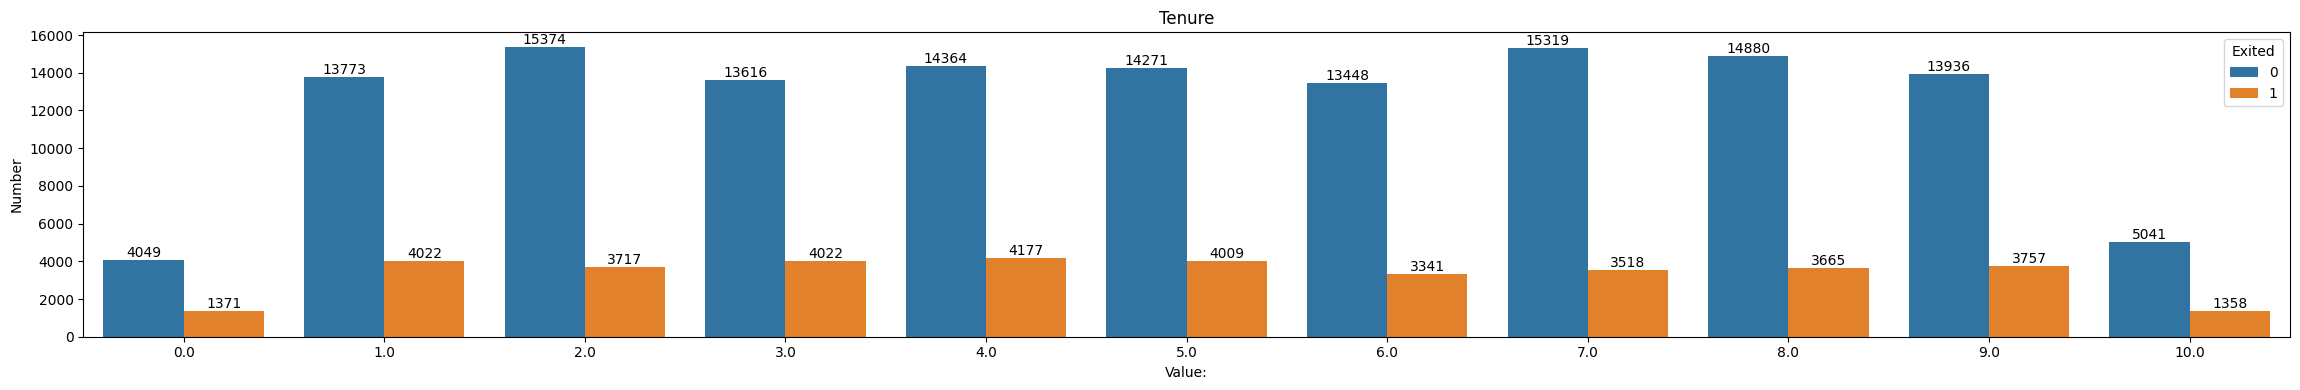

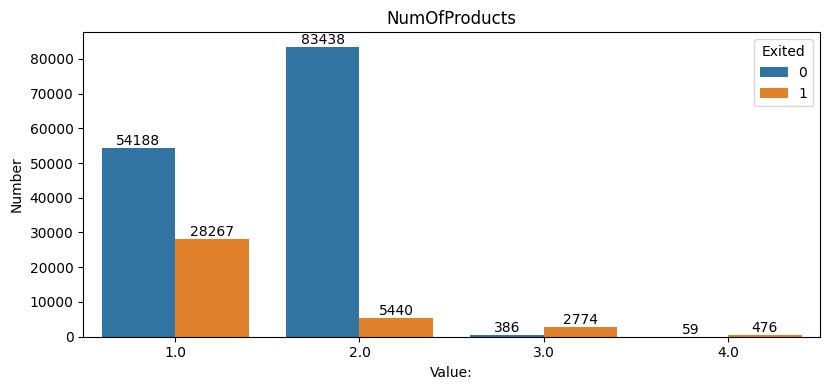

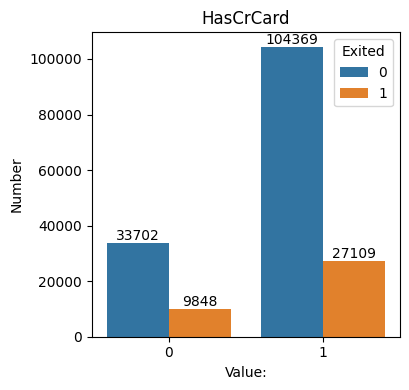

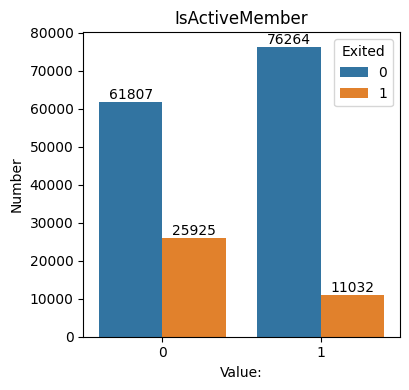

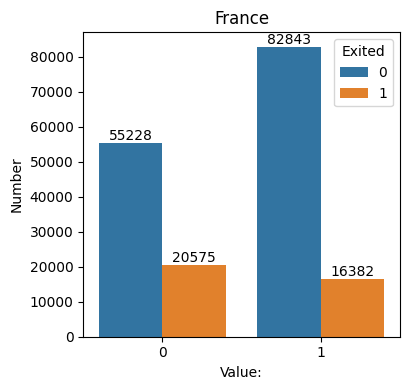

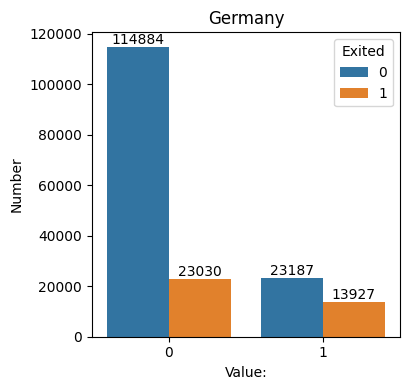

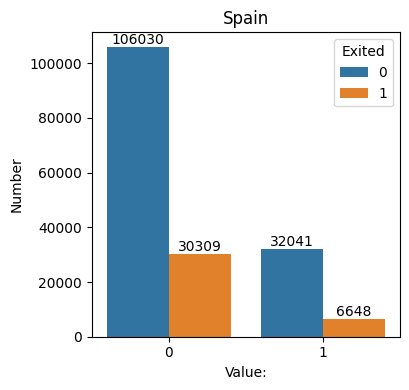

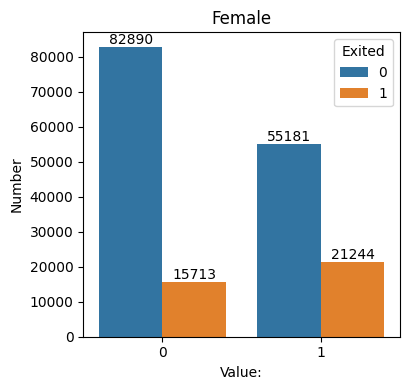

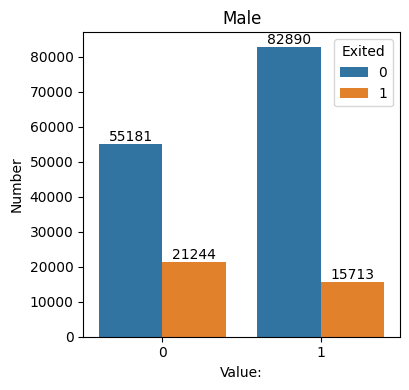

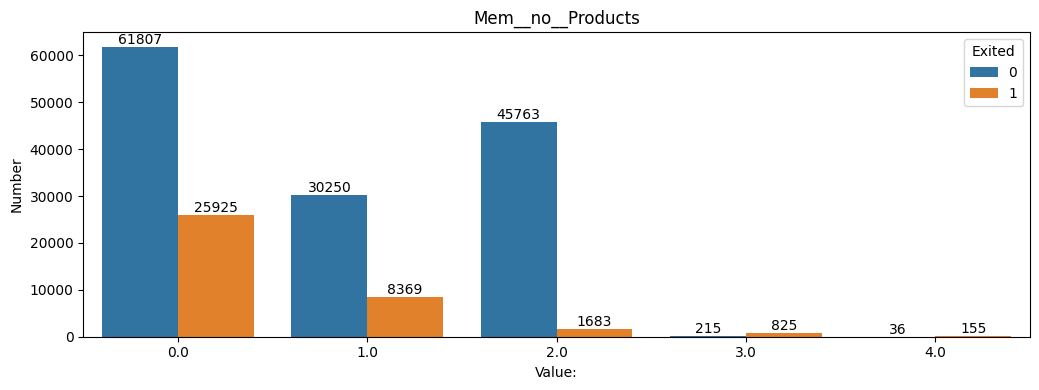

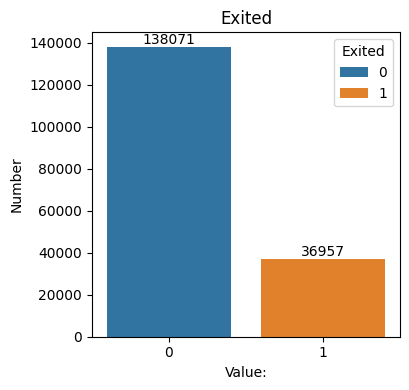

In [44]:
for i in category_cols:
    ax1 = sns.countplot(x=i, hue='Exited', data=data)
    ax1.set_xlabel('Value:')
    ax1.set_ylabel('Number')
    ax1.set_title(i)
    plt.gcf().set_size_inches(len(data[i].unique()) * 2.1, 4)

    for container in ax1.containers:
        ax1.bar_label(container)

    plt.tight_layout()
    plt.show()

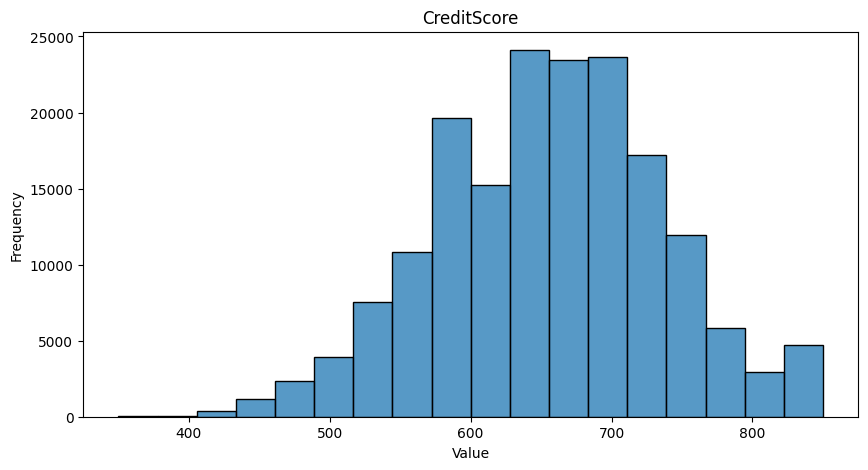

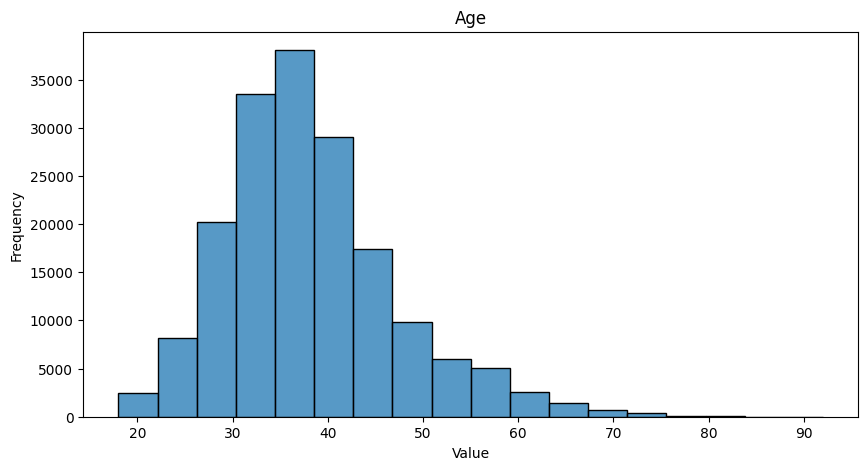

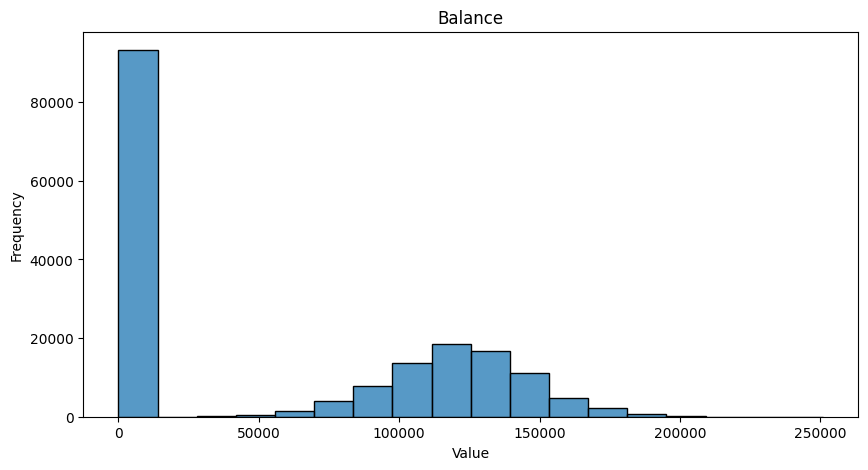

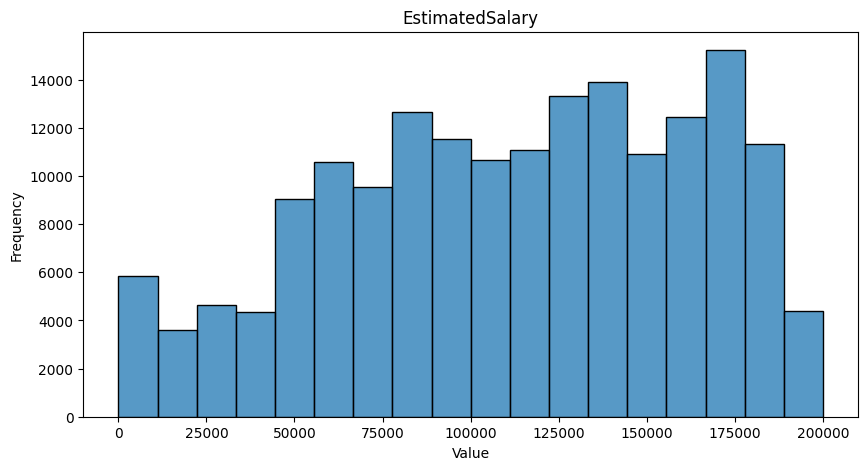

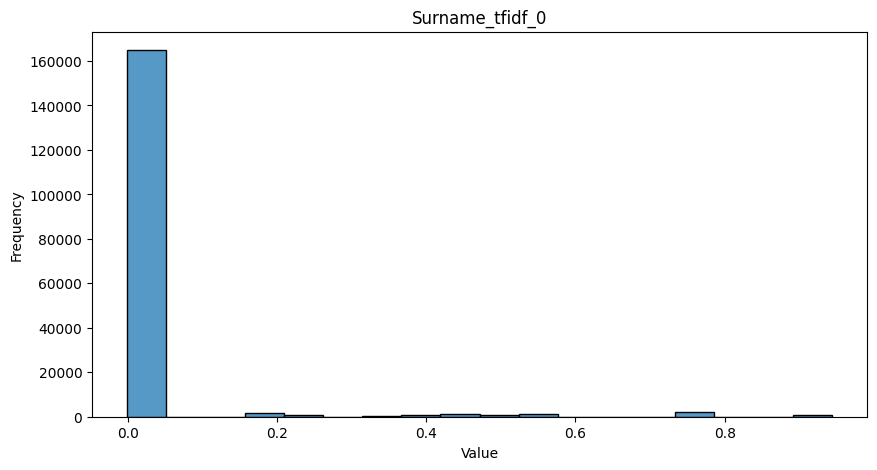

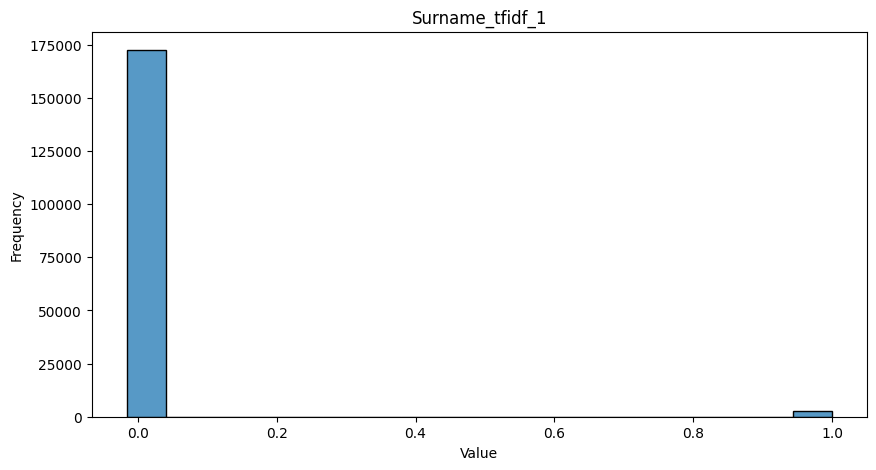

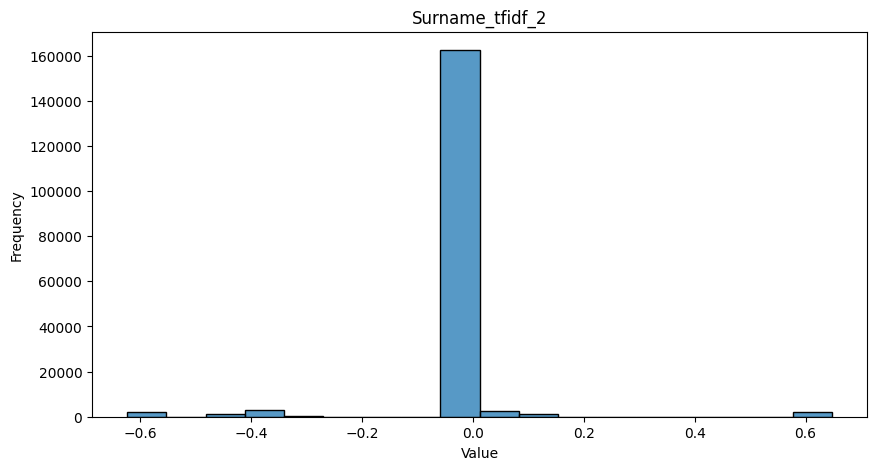

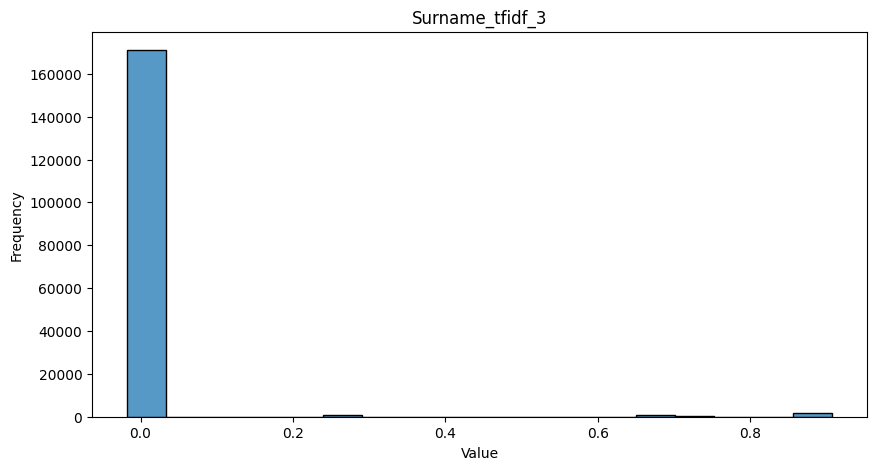

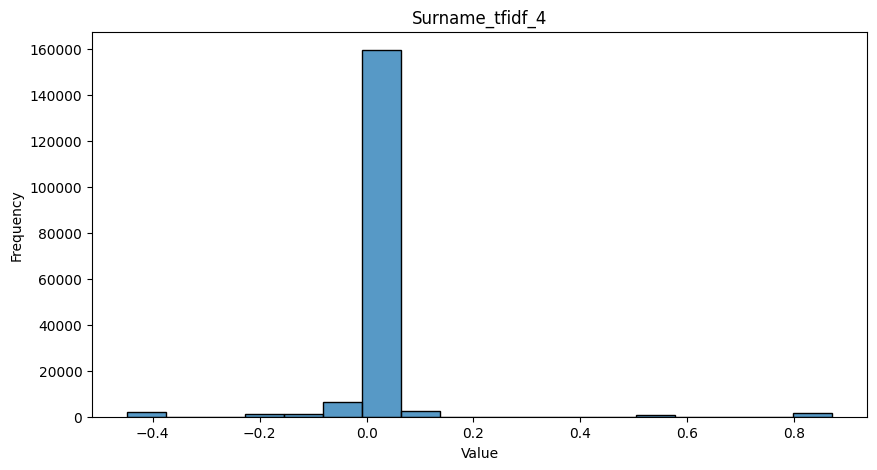

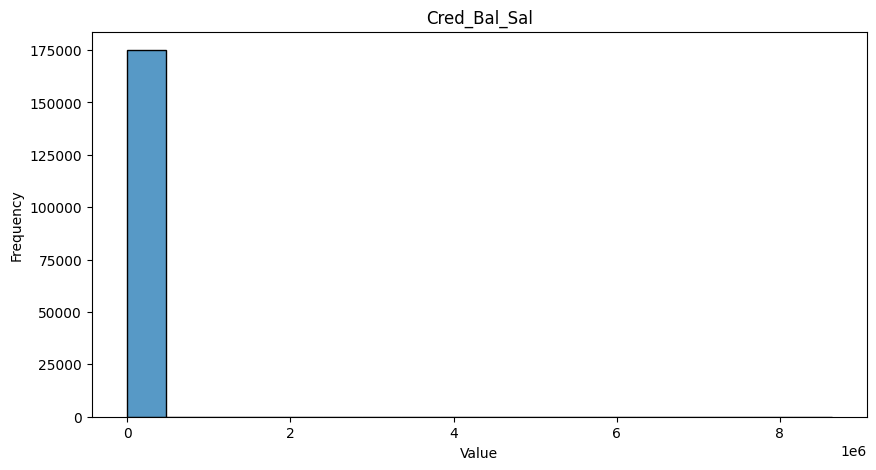

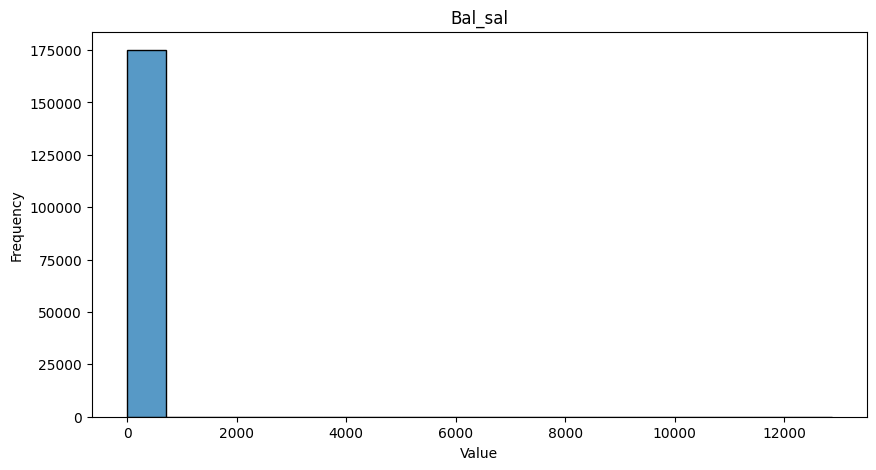

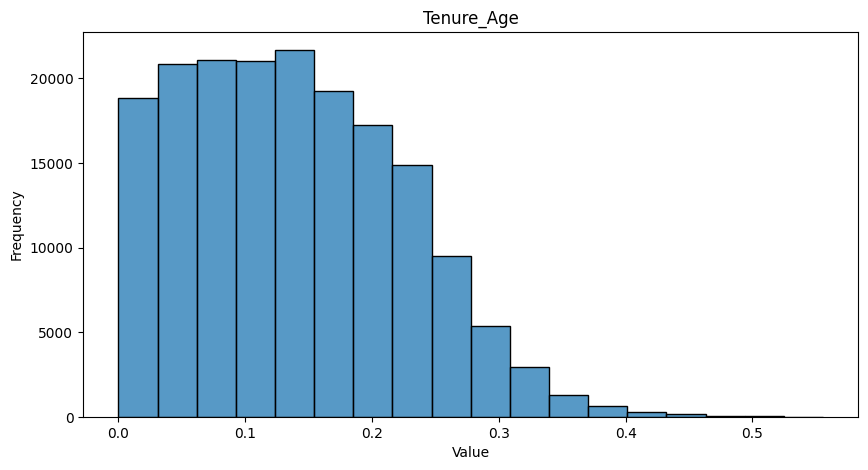

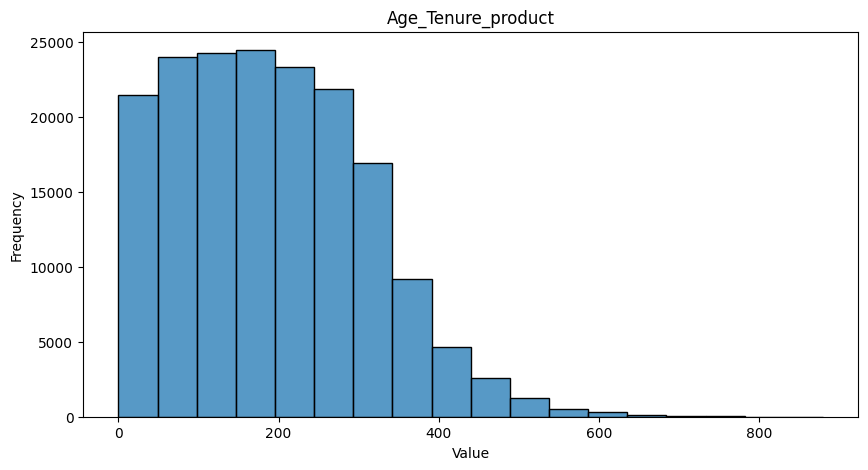

In [45]:
for i in numeric_cols:
  plt.figure(figsize=(10,5))
  ax2 = sns.histplot(data[i], bins=18)
  ax2.set_xlabel('Value')
  ax2.set_ylabel('Frequency')
  ax2.set_title(i)

# **FEATURES SELECTION**

***Chi-squared cho các columns phân loại***

In [46]:
remove_obj_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in category_cols:
  chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['Exited']))
  print(i, '---', pval)
  if pval > 0.05:
    remove_obj_cols.append(i)
  else:
    continue
print(remove_obj_cols)

Tenure --- 4.966353716693262e-53
NumOfProducts --- 0.0
HasCrCard --- 1.02791560656461e-18
IsActiveMember --- 0.0
France --- 0.0
Germany --- 0.0
Spain --- 3.4685662047281607e-102
Female --- 0.0
Male --- 0.0
Mem__no__Products --- 0.0
Exited --- 0.0
[]


***Spearman Correlation cho các columns số***

In [47]:
spear_cols = numeric_cols
spear_cols.append('Exited')
spearman_df = data[spear_cols]
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spearman_df.columns:
  if col == 'Exited':
    continue
  else:
    corr, p_value = spearmanr(spearman_df[col], spearman_df['Exited'])
    correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
#correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
0,CreditScore,-0.028622,4.696063e-33
1,Age,0.352788,0.000000e+00
2,Balance,0.124965,0.000000e+00
3,EstimatedSalary,0.019722,1.559738e-16
4,Surname_tfidf_0,0.002791,2.429752e-01
5,Surname_tfidf_1,0.015206,1.991193e-10
6,Surname_tfidf_2,-0.014627,9.377041e-10
7,Surname_tfidf_3,0.002864,2.308682e-01
8,Surname_tfidf_4,-0.006465,6.840238e-03
9,Cred_Bal_Sal,0.118770,0.000000e+00


In [48]:
data = data.drop(columns = ['EstimatedSalary', 'Surname_tfidf_1', 'Surname_tfidf_3',
                            'Surname_tfidf_0', 'Surname_tfidf_4', 'Surname_tfidf_2'])

***Correlation matrix***

In [49]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
Surname,1.000000,0.009076,-0.019451,-0.003101,-0.126933,0.050633,0.010640,0.002856,-0.027023,0.063097,-0.077550,0.001047,-0.002160,0.002160,0.019966,-0.003187,-0.003096,0.002373,-0.010954
CreditScore,0.009076,1.000000,-0.008876,0.000959,0.005578,0.011608,-0.002618,0.015376,-0.027252,-0.005318,0.002778,0.003614,-0.002120,0.002120,0.016590,0.002720,-0.000096,0.003839,-0.002536
Age,-0.019451,-0.008876,1.000000,-0.010786,0.063279,-0.097307,-0.012602,0.008956,0.336603,-0.065167,0.090263,-0.011098,0.060875,-0.060875,-0.014102,0.005436,0.005478,-0.352308,0.366820
Tenure,-0.003101,0.000959,-0.010786,1.000000,-0.009638,0.007708,0.006415,-0.006874,-0.019237,0.002628,-0.007315,0.004067,-0.009122,0.009122,-0.002951,0.000871,0.000793,0.908691,0.901456
Balance,-0.126933,0.005578,0.063279,-0.009638,1.000000,-0.357265,-0.020308,-0.014131,0.128391,-0.328374,0.530917,-0.130873,0.013806,-0.013806,-0.132032,0.026174,0.026296,-0.029202,0.015386
NumOfProducts,0.050633,0.011608,-0.097307,0.007708,-0.357265,1.000000,0.005613,0.037826,-0.204525,0.059614,-0.097313,0.024674,-0.023250,0.023250,0.327446,-0.011103,-0.011056,0.038842,-0.028288
HasCrCard,0.010640,-0.002618,-0.012602,0.006415,-0.020308,0.005613,1.000000,-0.020675,-0.021127,0.015866,-0.004604,-0.014411,-0.006612,0.006612,-0.015280,-0.001041,-0.000630,0.008510,0.001008
IsActiveMember,0.002856,0.015376,0.008956,-0.006874,-0.014131,0.037826,-0.020675,1.000000,-0.207201,0.016744,-0.035245,0.014724,-0.032999,0.032999,0.902879,0.002131,0.002158,-0.001938,-0.002628
Exited,-0.027023,-0.027252,0.336603,-0.019237,0.128391,-0.204525,-0.021127,-0.207201,1.000000,-0.129092,0.208584,-0.051319,0.144147,-0.144147,-0.227765,0.002884,0.003119,-0.129918,0.107580
France,0.063097,-0.005318,-0.065167,0.002628,-0.328374,0.059614,0.015866,0.016744,-0.129092,1.000000,-0.593515,-0.609468,-0.025342,0.025342,0.032868,-0.012411,-0.012641,0.022711,-0.021026


In [50]:
data = data.drop(columns = ['Tenure', 'IsActiveMember'])

In [51]:
data

,Surname,CreditScore,Age,Balance,NumOfProducts,HasCrCard,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,0.00,2.0,1,0,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,0.00,2.0,1,0,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,0.00,2.0,1,0,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,148882.54,1.0,1,0,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,0.00,2.0,1,0,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,155060.41,1.0,1,0,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000,196.0
175024,2846,800.0,29.0,0.00,2.0,0,0,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0
175025,1999,771.0,39.0,0.00,2.0,1,0,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0
175026,1336,516.0,35.0,57369.61,1.0,1,0,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0


# **PREDICTION**

In [52]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['Exited'], axis=1)
    features = X.columns

    y = data['Exited']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #Standard Scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [53]:
X_train, X_test, y_train, y_test = preprocess_data(data)

***1.Random Forest***

In [54]:
model_RF = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = 'balanced')
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110465
           1       0.99      1.00      0.99     29557

    accuracy                           1.00    140022
   macro avg       0.99      1.00      1.00    140022
weighted avg       1.00      1.00      1.00    140022

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27606
           1       0.72      0.52      0.61      7400

    accuracy                           0.86     35006
   macro avg       0.80      0.73      0.76     35006
weighted avg       0.85      0.86      0.85     35006



****2.XGBOOST**

In [55]:
model_XGB = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94    110465
           1       0.82      0.64      0.72     29557

    accuracy                           0.90    140022
   macro avg       0.87      0.80      0.83    140022
weighted avg       0.89      0.90      0.89    140022

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     27606
           1       0.73      0.56      0.64      7400

    accuracy                           0.86     35006
   macro avg       0.81      0.75      0.78     35006
weighted avg       0.86      0.86      0.86     35006



***3.SMOTE vs XGBOOST***

In [56]:
# Áp dụng SMOTE để tăng cường lớp 1
class_counts = y_train.value_counts()
smote = SMOTE(sampling_strategy={1: class_counts[0]}, random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [57]:
model_XGB_2 = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB_2.fit(X_train_resample, y_train_resample)

y_train_pred = model_XGB_2.predict(X_train_resample)
y_test_pred = model_XGB_2.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91    110465
           1       0.92      0.89      0.91    110465

    accuracy                           0.91    220930
   macro avg       0.91      0.91      0.91    220930
weighted avg       0.91      0.91      0.91    220930

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27606
           1       0.66      0.64      0.65      7400

    accuracy                           0.85     35006
   macro avg       0.78      0.78      0.78     35006
weighted avg       0.85      0.85      0.85     35006



***4.SMOTE sử dụng Stacking giữa Random Forest và XGBOOST**

In [60]:
# Các mô hình cơ bản (base models)
base_learners = [
    ('RF', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('XGB', xgb.XGBClassifier(n_estimators=200, random_state=42))
]

# Mô hình meta (meta-learner)
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression()
)

# Huấn luyện mô hình Stacking
stack_model.fit(X_train_resample, y_train_resample)

y_train_pred = stack_model.predict(X_train_resample)
y_test_pred = stack_model.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    110465
           1       0.99      0.99      0.99    110465

    accuracy                           0.99    220930
   macro avg       0.99      0.99      0.99    220930
weighted avg       0.99      0.99      0.99    220930

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27606
           1       0.65      0.64      0.65      7400

    accuracy                           0.85     35006
   macro avg       0.78      0.78      0.78     35006
weighted avg       0.85      0.85      0.85     35006



***5.SMOTE sử dụng Gridsearch***

In [61]:
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10, 50, 100]
}

index = 0

answers_grid = {
    'combination'       :[],
    'train_Accuracy'    :[],
    'test_Accuracy'     :[],
    'colsample_bytree'  :[],
    'learning_rate'     :[],
    'max_depth'         :[],
    'alpha'             :[],
    'n_estimators'      :[]
}

In [63]:
# Tạo một lưới các tham số
param_list = list(ParameterGrid(param_grid))

for params in param_list:
    # Tạo mô hình với các tham số hiện tại
    model_XGB_new = xgb.XGBClassifier(
        objective='binary:logistic',  # Sử dụng mục tiêu phân loại nhị phân
        colsample_bytree=params['colsample_bytree'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        alpha=params['alpha'],
        n_estimators=params['n_estimators']
    )

    # Huấn luyện mô hình
    model_XGB_new.fit(X_train_resample, y_train_resample)

    # Dự đoán trên tập huấn luyện và kiểm tra
    y_train_pred = model_XGB_new.predict(X_train_resample)
    y_test_pred = model_XGB_new.predict(X_test)

    # Tính toán độ chính xác
    train_accuracy = accuracy_score(y_train_resample, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Lưu trữ kết quả
    answers_grid['combination'].append(params)
    answers_grid['train_Accuracy'].append(train_accuracy)
    answers_grid['test_Accuracy'].append(test_accuracy)
    answers_grid['colsample_bytree'].append(params['colsample_bytree'])
    answers_grid['learning_rate'].append(params['learning_rate'])
    answers_grid['max_depth'].append(params['max_depth'])
    answers_grid['alpha'].append(params['alpha'])
    answers_grid['n_estimators'].append(params['n_estimators'])

# In kết quả tham số tốt nhất dựa trên độ chính xác tập kiểm tra
best_index = answers_grid['test_Accuracy'].index(max(answers_grid['test_Accuracy']))
print("Best Hyperparameters:", answers_grid['combination'][best_index])

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

Best Hyperparameters: {'alpha': 10, 'colsample_bytree': 0.9, 'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.89      0.88    110465
           1       0.89      0.86      0.88    110465

    accuracy                           0.88    220930
   macro avg       0.88      0.88      0.88    220930
weighted avg       0.88      0.88      0.88    220930

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     27606
           1       0.62      0.67      0.65      7400

    accuracy                           0.84     35006
   macro avg       0.77      0.78      0.77     35006
weighted avg       0.85      0.84      0.85     35006

